[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


C:\Users\mehdi\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


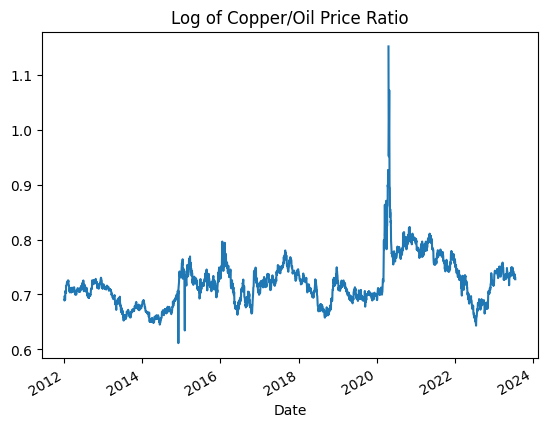

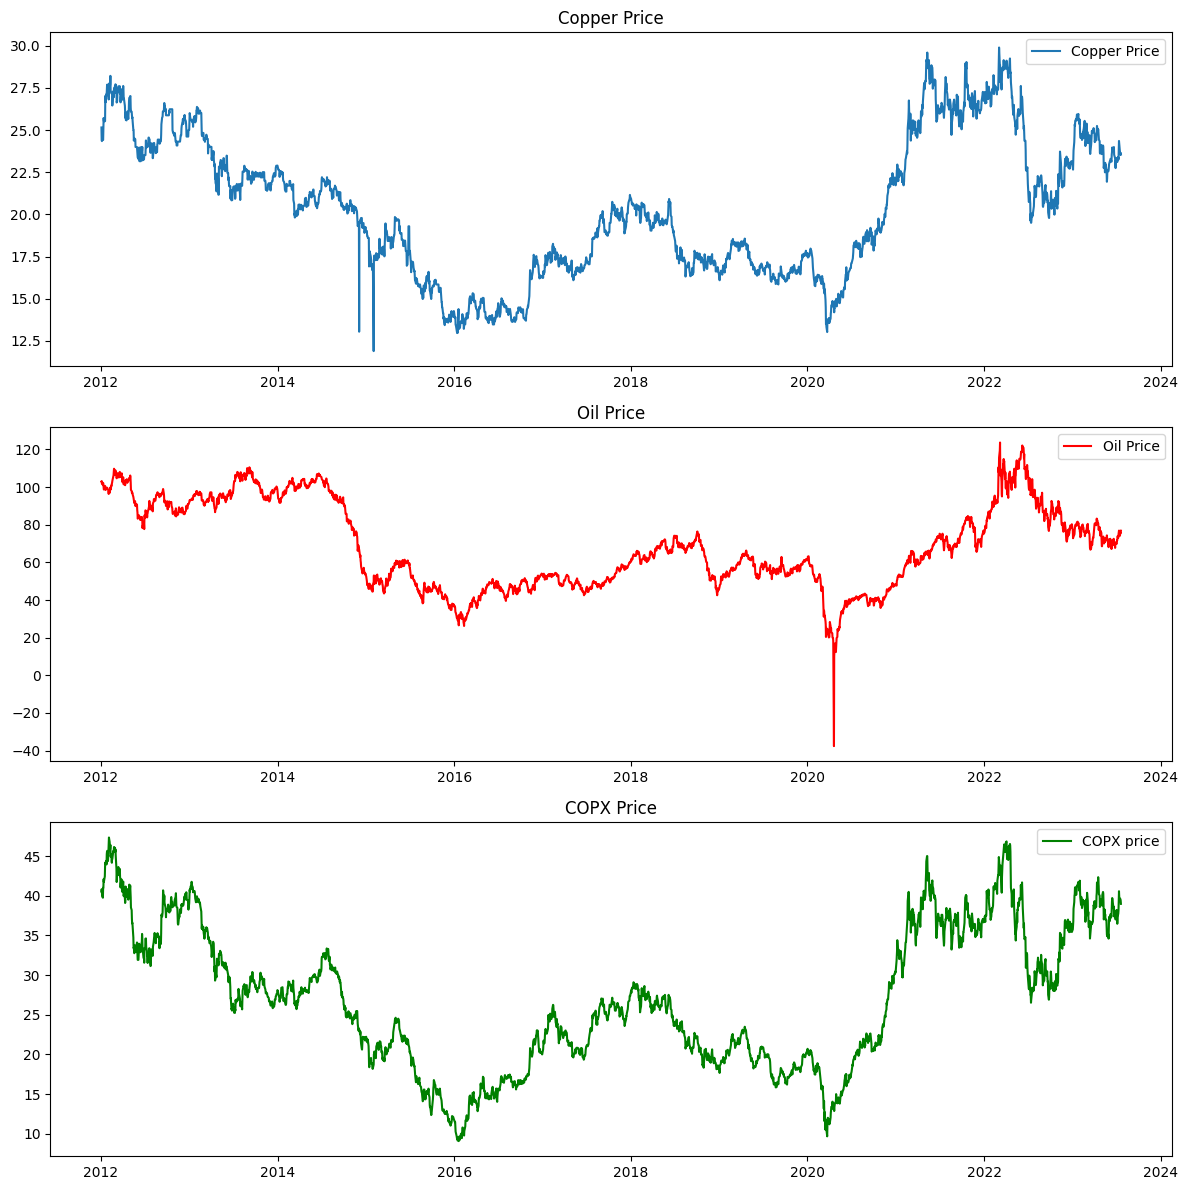

In [12]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import yfinance as yf
import matplotlib.pyplot as plt

# 1. Download data for copper prices, oil prices, and COPX returns
copper_price = yf.download('CPER', start='2012-01-01', end='2023-07-23')['Close']
oil_price = yf.download('CL=F', start='2012-01-01', end='2023-07-23')['Close']
copx_returns = yf.download('COPX', start='2012-01-01', end='2023-07-23')['Close']

# dropna and replace 0 values to avoid log calculation errors
copper_price.replace(0, np.nan, inplace=True)
oil_price.replace(0, np.nan, inplace=True)
copper_price.dropna(inplace=True)
oil_price.dropna(inplace=True)

# 2. Compute the log of copper price to the log of oil ratio
ratio = np.log(copper_price) / np.log(oil_price)

# 3. Plot ratio
ratio.plot(title='Log of Copper/Oil Price Ratio')

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(12, 12))

axs[0].plot(copper_price.index, copper_price, label='Copper Price')
axs[0].set_title('Copper Price')
axs[0].legend()

axs[1].plot(oil_price.index, oil_price, color='red', label='Oil Price')
axs[1].set_title('Oil Price')
axs[1].legend()

axs[2].plot(copx_returns.index, copx_returns, color='green', label='COPX price')
axs[2].set_title('COPX Price')
axs[2].legend()

plt.tight_layout()
plt.show()
